<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity   

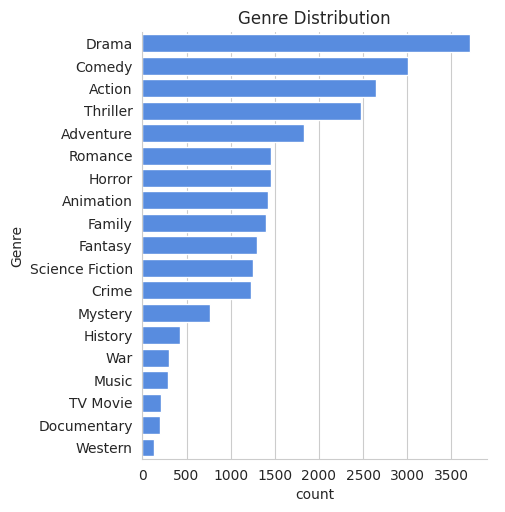

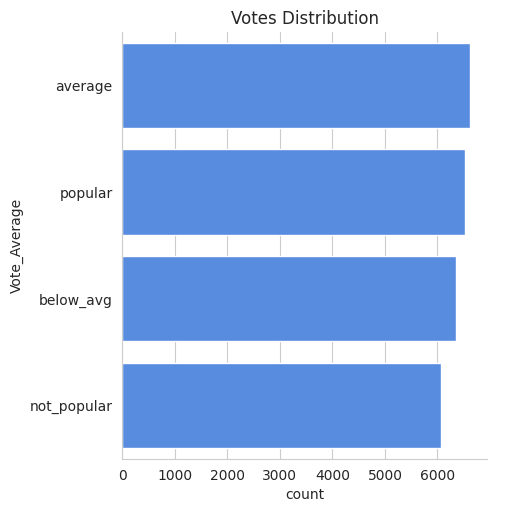

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
       Release_Date                                 Title  Popularity  \
25546          2021  The United States vs. Billie Holiday      13.354   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          2021  The United States vs. Billie Holiday      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   
25551          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
25546         152      averag

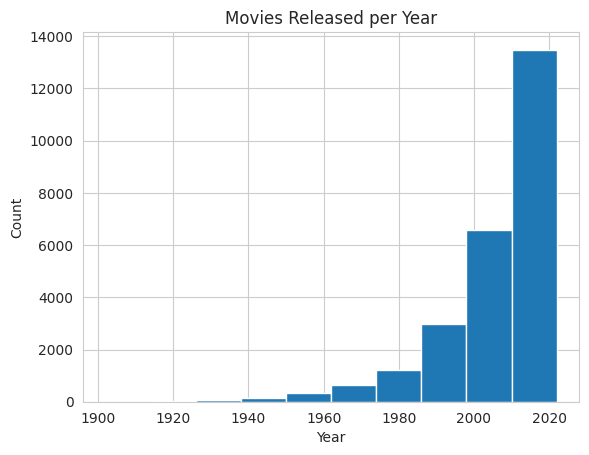

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

# Check dataset info
df.info()

# Check first few rows of Genre
df['Genre'].head()

# Check for duplicate rows
df.duplicated().sum()

# Summary statistics
df.describe()

# Convert Release_Date to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year

# Drop unnecessary columns
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)

# Categorize Vote_Average into labels
def catigorize_col(df, col, labels):
    """
    Categorizes a column based on its quartiles.
    """
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

labels = ['not_popular', 'below_avg', 'average', 'popular']
df = catigorize_col(df, 'Vote_Average', labels)

# Drop NaNs
df.dropna(inplace=True)

# Split Genre into list and explode
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

# Convert Genre to category
df['Genre'] = df['Genre'].astype('category')

# Summary after cleaning
df.info()

# Setup seaborn
sns.set_style('whitegrid')

# Q1: Most frequent genre
print(df['Genre'].describe())
sns.catplot(y='Genre', data=df, kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title('Genre Distribution')
plt.show()

# Q2: Genres by vote average
sns.catplot(y='Vote_Average', data=df, kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')
plt.title('Votes Distribution')
plt.show()

# Q3: Movie with highest popularity
print(df[df['Popularity'] == df['Popularity'].max()])

# Q4: Movie with lowest popularity
print(df[df['Popularity'] == df['Popularity'].min()])

# Q5: Year with most films
df['Release_Date'].hist()
plt.title('Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()